<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-sucesso-de-APPs-com-Ciencia-de-Dados/blob/main/Prevendo_sucesso_de_APP's_com_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo sucesso de APP's com Ciência de Dados**

---



## **1. Introdução**

Problema de negócio:      
- Predizer o sucesso (popularidade) de um aplicativo `Android` ao construir um modelo de _Machine Learning_ com base em um conjunto de dados.

## **2. Importando o conjunto de dados**

In [1]:
# importando os dados direto de uma url
!wget https://machinehack-be.s3.amazonaws.com/playstore_app_downloads_prediction_weekend_hackathon_16/PlayStoreApps-ParticipantsData.zip

--2021-11-20 12:09:34--  https://machinehack-be.s3.amazonaws.com/playstore_app_downloads_prediction_weekend_hackathon_16/PlayStoreApps-ParticipantsData.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.62.88
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.62.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 931277 (909K) [application/zip]
Saving to: ‘PlayStoreApps-ParticipantsData.zip.1’

PlayStoreApps-Parti 100%[===================>] 909.45K  1.49MB/s    in 0.6s    

2021-11-20 12:09:35 (1.49 MB/s) - ‘PlayStoreApps-ParticipantsData.zip.1’ saved [931277/931277]



In [2]:
# descompactando o arquivo
!unzip PlayStoreApps-ParticipantsData.zip

Archive:  PlayStoreApps-ParticipantsData.zip
replace PlayStoreApps-ParticipantsData/Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PlayStoreApps-ParticipantsData/Train.csv  
replace PlayStoreApps-ParticipantsData/Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PlayStoreApps-ParticipantsData/Test.csv  
replace PlayStoreApps-ParticipantsData/Sample_Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PlayStoreApps-ParticipantsData/Sample_Submission.csv  


In [3]:
# importando as bibliotecas
import pandas as pd                 # modelagem de dados
import numpy as np                  # modelagem matemática
import matplotlib.pyplot as plt     # visualização gráfica
import seaborn as sns               # visualização gráfica

%matplotlib inline

In [4]:
# importando a biblioteca para ignorar "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# instanciando cada base de dados em um objeto distinto
train = pd.read_csv('/content/PlayStoreApps-ParticipantsData/Train.csv')
test = pd.read_csv('/content/PlayStoreApps-ParticipantsData/Test.csv')

## **3. Análise exploratória do conjunto de dados**

In [6]:
# visualizando as 5 primeiras linhas 
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [7]:
# visualizando as 5 primeiras linhas 
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [8]:
# nome dos atributos (colunas)
train.columns

Index(['Offered_By', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content_Rating', 'Last_Updated_On', 'Release_Version',
       'OS_Version_Required', 'Downloads'],
      dtype='object')

**Descrição dos atributos:** 
- `Offered_By`: editor/organização/empresa que desenvolveu o aplicativo;
- `Category`: categória/gênero do aplicativo;
- `Rating`: ranque da avaliação do aplicativo; 
- `Reviews`: quantidade de avaliações do aplicativo;
- `Size`: tamanho do aplicativo;
- `Price`: preço do aplicativo;
- `Content_Rating`: classificação do aplicativo por faixas de idades;    
- `Last_Updated_On`: data da última atualização do aplicativo;     
- `Release_Version`: versão atual do aplicativo;
- `OS_Version_Required`: versão mínima requerida do sistema operacional Android para execução do aplicativo;  
- `Downloads`: intervalo aproximado de downloads do aplicativo.

**Objetivo:** Classificar a faixa em que se enquadra a aplicação em função do número de downloads.

In [9]:
# nome dos atributos (colunas)
test.columns

Index(['Offered_By', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content_Rating', 'Last_Updated_On', 'Release_Version',
       'OS_Version_Required'],
      dtype='object')

> Perceba que, na base de dados **test** não tem o atributo `Downloads`.

In [10]:
# dimensão da base de dados
train.shape     # linhas e colunas

(16516, 11)

In [11]:
# dimensão da base de dados
test.shape      # linhas e colunas

(24776, 10)

> Outro ponto interessante é sobre a dimensão das bases de dados. Há mais linhas no conjunto de teste do que a do treino.

In [12]:
# informações gerais
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [13]:
# informações gerais
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           24776 non-null  object 
 1   Category             24776 non-null  object 
 2   Rating               24776 non-null  float64
 3   Reviews              24776 non-null  int64  
 4   Size                 24776 non-null  object 
 5   Price                24776 non-null  object 
 6   Content_Rating       24776 non-null  object 
 7   Last_Updated_On      24776 non-null  object 
 8   Release_Version      24776 non-null  object 
 9   OS_Version_Required  24776 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [14]:
# contabiblizando valores nulos e/ou faltantes do conjunto de dados
train.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64

In [15]:
# contabiblizando valores nulos e/ou faltantes do conjunto de dados
test.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
dtype: int64

In [16]:
# tipo de dado dos atributos
train.dtypes

Offered_By              object
Category                object
Rating                 float64
Reviews                  int64
Size                    object
Price                   object
Content_Rating          object
Last_Updated_On         object
Release_Version         object
OS_Version_Required     object
Downloads               object
dtype: object

In [17]:
# concatenando as bases de dados
df = train.append(test, ignore_index=True)

In [18]:
# visualizando o objeto criado
df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"
...,...,...,...,...,...,...,...,...,...,...,...
41287,ps_id-30176,Shopping,3.74,38,21M,Free,Everyone,Feb 16 2020,2.4.20,4.1 and up,NaN
41288,ps_id-5357,Auto And Vehicles,4.80,4,4.5M,Free,Everyone,Jan 02 2019,1.3,5.0 and up,NaN
41289,ps_id-1920,Education,4.78,499,1.1M,Free,Everyone,Feb 16 2018,1.1,4.0.3 and up,NaN
41290,ps_id-6655,Game Puzzle,4.61,328050,72M,Free,Everyone,May 02 2020,2.5.3,4.1 and up,NaN


In [19]:
# dimensão do objeto criado
df.shape    # linhas e colunas

(41292, 11)

In [20]:
# nomes das colunas
df.columns

Index(['Offered_By', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content_Rating', 'Last_Updated_On', 'Release_Version',
       'OS_Version_Required', 'Downloads'],
      dtype='object')

In [21]:
# contabiblizando valores nulos e/ou faltantes do conjunto de dados
df.isnull().sum()

Offered_By                 0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Price                      0
Content_Rating             0
Last_Updated_On            0
Release_Version            0
OS_Version_Required        0
Downloads              24776
dtype: int64

> Agora temos um número considerado de valores nulos e/ou faltantes no conjunto de dados criado. Isso se deve que, ao realizarmos a concatenação das bases de dados treino e teste, foi realizado um _empilhamento_ das bases de dados, como o atributo `Downloads` não estava presente no **test** e, o mesmo possui 24.776 linhas, essas linhas foram preenchidas como valores **NaN**.

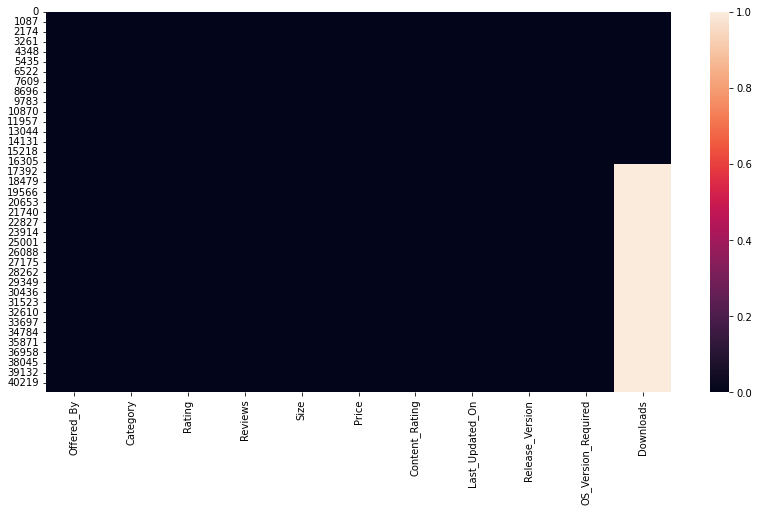

In [22]:
# visualizando graficamente há presença de valores nulos e/ou faltantes
plt.figure(figsize=[14, 7])
sns.heatmap(df.isnull());

> Podemos visualizar que, o atributo `Downloads` possui valores nulos e/ou falatantes. Iremos tratar do problema mais à frente!

In [23]:
# visualizando a quantidade de instâncias únicas do conjunto de dados
df.nunique()

Offered_By             36772
Category                  51
Rating                   347
Reviews                18724
Size                     703
Price                    129
Content_Rating             6
Last_Updated_On         2012
Release_Version         8052
OS_Version_Required       37
Downloads                 18
dtype: int64

In [24]:
# visualizando as instâncias do atributo "Size"
df['Size'].value_counts()

Varies with device    4830
11M                   1015
12M                    872
13M                    773
14M                    761
                      ... 
686k                     1
86k                      1
347M                     1
472k                     1
615k                     1
Name: Size, Length: 703, dtype: int64

In [25]:
# visualizando as instâncias únicas do atributo "Category"
df['Category'].unique()

array(['Finance', 'Music And Audio', 'Game Casual', 'Business', 'Medical',
       'Books And Reference', 'Tools', 'Game', 'Travel And Local',
       'Family', 'Game Simulation', 'Lifestyle', 'Comics', 'Education',
       'Entertainment', 'Game Action', 'Social', 'Sports', 'Photography',
       'Game Word', 'Game Trivia', 'Communication', 'News And Magazines',
       'Game Board', 'House And Home', 'Personalization', 'Game Puzzle',
       'Productivity', 'Health And Fitness', 'Shopping', 'Art And Design',
       'Weather', 'Maps And Navigation', 'Dating', 'Game Arcade',
       'Game Role Playing', 'Game Educational', 'Video Players',
       'Game Strategy', 'Food And Drink', 'Game Sports',
       'Auto And Vehicles', 'Events', 'Game Adventure', 'Parenting',
       'Libraries And Demo', 'Game Racing', 'Game Card', 'Game Music',
       'Game Casino', 'Beauty'], dtype=object)

In [26]:
# contabilizando as instâncias únicas do atributo "Category"
df['Category'].value_counts()

Education              3580
Tools                  3130
Entertainment          2232
Books And Reference    1812
Family                 1746
Finance                1687
Lifestyle              1682
Productivity           1464
Music And Audio        1342
Business               1327
Personalization        1151
Health And Fitness     1098
Game                   1094
News And Magazines     1058
Game Puzzle            1002
Photography             979
Communication           962
Travel And Local        947
Sports                  931
Shopping                900
Medical                 839
Game Casual             707
Social                  689
Game Arcade             669
Game Action             572
Food And Drink          566
Game Simulation         517
Game Card               496
Video Players           490
Game Educational        488
Maps And Navigation     485
Game Role Playing       421
Game Strategy           362
Game Racing             319
Game Adventure          315
Game Sports         

## **4. Pré-procesamento do conjunto de dados**

In [27]:
# tratando o atributo "Size" (tamanho) - iremos criar uma nova coluna "Size_type"
# para realizarmos o tratamento desse do atributo em questão "Size"
df['Size_type'] = df['Size'].str.strip().str[-1]

# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41292 entries, 0 to 41291
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           41292 non-null  object 
 1   Category             41292 non-null  object 
 2   Rating               41292 non-null  float64
 3   Reviews              41292 non-null  int64  
 4   Size                 41292 non-null  object 
 5   Price                41292 non-null  object 
 6   Content_Rating       41292 non-null  object 
 7   Last_Updated_On      41292 non-null  object 
 8   Release_Version      41292 non-null  object 
 9   OS_Version_Required  41292 non-null  object 
 10  Downloads            16516 non-null  object 
 11  Size_type            41292 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.8+ MB


In [28]:
# lista para salvar o tratamento das instâncias da coluna criada "Size_type"
x = []

# realizando um loop para aplicar a transformação 
for i in df['Size_type']:
    if i == 'e':
        x.append(0)
    elif i == 'M':
        x.append(1024)
    elif i == 'k':
        x.append(1)

# preenchendo o valor da coluna "Size_type" com os valores da lista "x"
df['Size_type'] = x

# extraindo o sinal de "+"
df['Size_t'] = df['Size'].str.extract('(\d+)')

# substituindo os dados faltantes (missing) por zero
df['Size_t'] = df['Size_t'].fillna(0)

# multiplicando o campo pela sua dimensão (M: mega - multiplica por 1024)
df['Size'] = df['Size_type'].astype(int) * df['Size_t'].astype(int)

# deletando as colunas após o tratamento
del df['Size_type']
del df['Size_t']

# imputação de dados de zero (0) pela média
df['Size'] = df['Size'].replace(0, df['Size'].mean())


In [29]:
# visualizando o "df" após os tratamentos
df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,20254.44413,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10240.00000,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27648.00000,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,20254.44413,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,20254.44413,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"
...,...,...,...,...,...,...,...,...,...,...,...
41287,ps_id-30176,Shopping,3.74,38,21504.00000,Free,Everyone,Feb 16 2020,2.4.20,4.1 and up,NaN
41288,ps_id-5357,Auto And Vehicles,4.80,4,4096.00000,Free,Everyone,Jan 02 2019,1.3,5.0 and up,NaN
41289,ps_id-1920,Education,4.78,499,1024.00000,Free,Everyone,Feb 16 2018,1.1,4.0.3 and up,NaN
41290,ps_id-6655,Game Puzzle,4.61,328050,73728.00000,Free,Everyone,May 02 2020,2.5.3,4.1 and up,NaN


In [30]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41292 entries, 0 to 41291
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           41292 non-null  object 
 1   Category             41292 non-null  object 
 2   Rating               41292 non-null  float64
 3   Reviews              41292 non-null  int64  
 4   Size                 41292 non-null  float64
 5   Price                41292 non-null  object 
 6   Content_Rating       41292 non-null  object 
 7   Last_Updated_On      41292 non-null  object 
 8   Release_Version      41292 non-null  object 
 9   OS_Version_Required  41292 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.5+ MB


In [31]:
# substituindo a instância "free" do atributo "Price" por zero (0)
df['Price'] = df['Price'].replace('Free', 0).astype(float)

In [32]:
# visualizando as instâncias únicas do atributo "Price"
df['Price'].unique()

array([    0.    ,   297.5742,   222.9942,   111.1242,   372.1542,
         148.4142,    73.8342,   894.2142,   446.7342,   670.4742,
         745.0542,  2833.2942,   409.4442,   190.9248,   260.2842,
        1863.7542,   185.7042,   334.8642,   595.8942,  1341.6942,
         126.786 ,   131.2608,   319.9482,  2236.6542, 29831.2542,
         521.3142, 28339.6542,   968.7942,   335.61  ,  1192.5342,
         298.32  ,  1117.9542,   186.45  ,   164.076 ,   342.3222,
          88.7502,   264.759 ,   577.2492,   742.071 ,  2087.4942,
        1490.8542,    78.309 ,   447.48  , 29085.4542,   428.0892,
         707.7642,   558.6042,   178.992 ,   369.171 ,   240.1476,
         355.7466,   633.1842,   360.9672,    96.2082,   149.16  ,
         429.5808,   484.0242,  1043.3742,   118.5822,   287.133 ,
         656.304 ,    93.9708,    74.58  ,   111.87  ,   730.1382,
         229.7064,   284.1498,  1789.1742,   289.3704,   279.675 ,
         469.1082,   223.74  ,  2385.8142,  1416.2742,   225.2

In [33]:
# tranformando as instâncias do atributo "Last_Updated_On" para o tipo datatime
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

In [34]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41292 entries, 0 to 41291
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Offered_By           41292 non-null  object        
 1   Category             41292 non-null  object        
 2   Rating               41292 non-null  float64       
 3   Reviews              41292 non-null  int64         
 4   Size                 41292 non-null  float64       
 5   Price                41292 non-null  float64       
 6   Content_Rating       41292 non-null  object        
 7   Last_Updated_On      41292 non-null  datetime64[ns]
 8   Release_Version      41292 non-null  object        
 9   OS_Version_Required  41292 non-null  object        
 10  Downloads            16516 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [35]:
# visualizando o tipo de dado do atributo "Last_Updated_On"
df['Last_Updated_On'].dtypes

dtype('<M8[ns]')

In [36]:
# visualizando o atributo "Last_Updated_On"
df['Last_Updated_On'].head(10)  # as 10 primeiras linhas

0   2020-05-05
1   2020-03-26
2   2020-05-01
3   2020-05-02
4   2018-11-29
5   2019-02-05
6   2019-07-25
7   2020-05-05
8   2019-03-01
9   2016-09-29
Name: Last_Updated_On, dtype: datetime64[ns]

Agora vamos tratar das instâncias presentes no atributo `Last_Updated_On`, onde iremos desagregar a data em ano, dia, dia do ano, mês, dia da semana e semana.

In [37]:
# criando variáveis de séries temporais
k = ['Last_Updated_On']

for i in k:
    df[i + '_' + 'year'] = df[i].dt.year
    df[i + '_' + 'day'] = df[i].dt.day
    df[i + '_' + 'weekofyear'] = df[i].dt.weekofyear
    df[i + '_' + 'month'] = df[i].dt.month
    df[i + '_' + 'dayofweek'] = df[i].dt.dayofweek
    df[i + '_' + 'weekend'] = (df[i].dt.weekday >= 5).astype(int)

# deletando a coluna do conjunto de dados
del df['Last_Updated_On']

In [38]:
# visualizando os 5 últimos atributos da base de dados
df.columns[-5:]

Index(['Last_Updated_On_day', 'Last_Updated_On_weekofyear',
       'Last_Updated_On_month', 'Last_Updated_On_dayofweek',
       'Last_Updated_On_weekend'],
      dtype='object')

In [39]:
# frequência das instâncias do atributo "Release_Version"
df['Release_Version'].value_counts()

Varies with device    3880
1                     1758
1.1                    910
1.2                    723
1.3                    573
                      ... 
4.4.0.382469             1
0.0.53                   1
1.4.0-2                  1
165.2.0                  1
1.73.0                   1
Name: Release_Version, Length: 8052, dtype: int64

In [40]:
# atribuindo valor de zero (0) para a instância "Varies with device"
df['Release_Version'] = df['Release_Version'].replace('Varies with device', '0')

In [41]:
# contabilizando a distribuição dos dados do atributo "Release_Version"
df['Release_Version'].value_counts().head(20)   # as 20 primeiras instâncias

0        3880
1        1758
1.1       910
1.2       723
1.3       573
2         475
1.4       473
1.0       454
1.5       377
1.0.1     368
1.0.0     339
2.1       318
1.6       313
1.0.2     289
3         278
1.7       264
1.0.3     259
2.2       213
1.0.5     211
1.8       207
Name: Release_Version, dtype: int64

In [42]:
# criando uma função para separar as colunas numéricas e categóricas do conjunto de dados
df_copy = df.copy()     # criando uma cópia da base de dados

def separate_cols(df):
    cols_cats = []
    cols_nums = []

    for col in df.columns:     # excluindo a último coluna - o alvo
    # for col in df.drop('Downloads'):
        if df.dtypes[col] == 'object':
            cols_cats.append(col)
        else:
            cols_nums.append(col)
    
    return f'cols categ: {len(cols_cats), cols_cats}', f'cols nums: {len(cols_nums), cols_nums}'

In [43]:
# aplicando a função no df_copy
separate_cols(df_copy)

("cols categ: (6, ['Offered_By', 'Category', 'Content_Rating', 'Release_Version', 'OS_Version_Required', 'Downloads'])",
 "cols nums: (10, ['Rating', 'Reviews', 'Size', 'Price', 'Last_Updated_On_year', 'Last_Updated_On_day', 'Last_Updated_On_weekofyear', 'Last_Updated_On_month', 'Last_Updated_On_dayofweek', 'Last_Updated_On_weekend'])")

> Temos **6 atributos categóricos** e **10 numéricos**.

Nessa etapa iremos tratar dos atributos categóricos. Já que o modelo de aprendizado de máquina espera receber valores numéricos.

In [44]:
# importando a biblioteca
from sklearn.preprocessing import LabelEncoder

# instanciando a função
encoder = LabelEncoder()

In [45]:
# aplicando a função no atributo de interesse, nesse caso o "Release_Version"
df['Release_Version'] = encoder.fit_transform(df['Release_Version'])

# visualizando as classes criadas pelo encoder
encoder.classes_

array(['0', '0.0.0-34-animals', '0.0.0-34-leaders', ..., 'Zs 5.2',
       '_18.08.01_ps', '_19.02.01-us_sy_ps'], dtype=object)

In [46]:
# contabilizando as instâncias únicas do atributo "Release_Version"
df['Release_Version'].value_counts()

0       3880
351     1758
797      910
1258     723
1559     573
        ... 
1393       1
5491       1
3472       1
1425       1
2047       1
Name: Release_Version, Length: 8052, dtype: int64

In [47]:
# aplicando a função no atributo de interesse, nesse caso o "Category"
df['Category'] = encoder.fit_transform(df['Category'])

# visualizando as classes criadas pelo encoder
encoder.classes_

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Family',
       'Finance', 'Food And Drink', 'Game', 'Game Action',
       'Game Adventure', 'Game Arcade', 'Game Board', 'Game Card',
       'Game Casino', 'Game Casual', 'Game Educational', 'Game Music',
       'Game Puzzle', 'Game Racing', 'Game Role Playing',
       'Game Simulation', 'Game Sports', 'Game Strategy', 'Game Trivia',
       'Game Word', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Maps And Navigation',
       'Medical', 'Music And Audio', 'News And Magazines', 'Parenting',
       'Personalization', 'Photography', 'Productivity', 'Shopping',
       'Social', 'Sports', 'Tools', 'Travel And Local', 'Video Players',
       'Weather'], dtype=object)

In [48]:
# contabilizando as instâncias únicas do atributo "Category"
df['Category'].value_counts()

8     3580
47    3130
9     2232
3     1812
11    1746
12    1687
35    1682
43    1464
38    1342
4     1327
41    1151
32    1098
14    1094
39    1058
24    1002
42     979
6      962
48     947
46     931
44     900
37     839
21     707
45     689
17     669
15     572
13     566
27     517
19     496
49     490
22     488
36     485
26     421
29     362
25     319
16     315
28     305
7      297
1      295
50     275
31     271
18     271
0      224
33     204
40     159
20     158
30     143
5      138
10     136
2      132
34     128
23      97
Name: Category, dtype: int64

In [49]:
# aplicando a função no atributo de interesse, nesse caso o "Content_Rating"
df['Content_Rating'] = encoder.fit_transform(df['Content_Rating'])

# visualizando as classes criadas pelo encoder
encoder.classes_

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [50]:
# contabilizando as instâncias únicas do atributo "Content_Rating"
df['Content_Rating'].value_counts()

1    34810
4     3941
2     1449
3     1082
0        6
5        4
Name: Content_Rating, dtype: int64

In [51]:
# aplicando a função no atributo de interesse, nesse caso o "OS_Version_Required"
df['OS_Version_Required'] = encoder.fit_transform(df['OS_Version_Required'])

# visualizando as classes criadas pelo encoder
encoder.classes_

array(['1.0 and up', '1.1 and up', '1.5 and up', '1.6 and up',
       '2.0 and up', '2.0.1 and up', '2.1 and up', '2.2 - 6.0',
       '2.2 and up', '2.3 - 3.2', '2.3 and up', '2.3.3 and up',
       '3.0 and up', '3.1 and up', '3.2 and up', '4.0 - 5.1',
       '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up', '4.1 - 7.1.1',
       '4.1 - 8.0', '4.1 and up', '4.2 - 8.0', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4w and up', '5.0 - 6.0', '5.0 - 8.0',
       '5.0 and up', '5.1 and up', '6.0 and up', '7.0 - 7.1.1',
       '7.0 and up', '7.1 and up', '8.0 and up', 'Varies with device'],
      dtype=object)

In [52]:
# contabilizando as instâncias únicas do atributo "OS_Version_Required"
df['OS_Version_Required'].value_counts()

21    10505
18     6447
16     4908
25     4532
36     3642
29     3182
10     1893
23     1813
24      903
11      663
8       651
12      591
31      409
6       310
3       188
30      149
33      124
2        84
14       62
4        60
26       48
13       38
5        29
35       28
34       12
0         5
28        3
17        2
19        2
1         2
9         1
15        1
7         1
20        1
22        1
27        1
32        1
Name: OS_Version_Required, dtype: int64

In [53]:
# eliminando o sinal de "+" das instâncias do atributo "Offered_By"
df['Offered_By'] = df['Offered_By'].str.extract('(\d+)').astype(int)

In [54]:
# contabilizando as instâncias únicas do atributo "Offered_By"
df['Offered_By'].value_counts()

863      52
1157     36
30264    34
1515     22
1713     22
         ..
20253     1
22302     1
24351     1
34596     1
0         1
Name: Offered_By, Length: 36772, dtype: int64

In [55]:
# visualizando o conjunto de dados
df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Last_Updated_On_year,Last_Updated_On_day,Last_Updated_On_weekofyear,Last_Updated_On_month,Last_Updated_On_dayofweek,Last_Updated_On_weekend
0,24654,12,4.18,1481,20254.44413,0.0000,1,0,36,"100,000+",2020,5,19,5,1,0
1,35329,38,4.81,302,10240.00000,0.0000,1,5407,21,"5,000+",2020,26,13,3,3,0
2,11044,21,4.27,374,27648.00000,0.0000,1,980,21,"10,000+",2020,1,18,5,4,0
3,36068,4,4.03,122058,20254.44413,0.0000,4,0,36,"10,000,000+",2020,2,18,5,5,1
4,35831,37,4.60,358,20254.44413,297.5742,1,0,36,"5,000+",2018,29,48,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41287,30176,44,3.74,38,21504.00000,0.0000,1,3951,21,NaN,2020,16,7,2,6,1
41288,5357,1,4.80,4,4096.00000,0.0000,1,1559,29,NaN,2019,2,1,1,2,0
41289,1920,8,4.78,499,1024.00000,0.0000,1,797,18,NaN,2018,16,7,2,4,0
41290,6655,24,4.61,328050,73728.00000,0.0000,1,4068,21,NaN,2020,2,18,5,5,1


In [56]:
# instanciando as bases de dados de treino e teste
train = df[df['Downloads'].isnull() == False]
test = df[df['Downloads'].isnull() == True]

# deletando o atributo "Downloads" da base de dados de teste
del test['Downloads']

In [57]:
# visualizando a base de dados de treino
train

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Last_Updated_On_year,Last_Updated_On_day,Last_Updated_On_weekofyear,Last_Updated_On_month,Last_Updated_On_dayofweek,Last_Updated_On_weekend
0,24654,12,4.18,1481,20254.44413,0.0000,1,0,36,"100,000+",2020,5,19,5,1,0
1,35329,38,4.81,302,10240.00000,0.0000,1,5407,21,"5,000+",2020,26,13,3,3,0
2,11044,21,4.27,374,27648.00000,0.0000,1,980,21,"10,000+",2020,1,18,5,4,0
3,36068,4,4.03,122058,20254.44413,0.0000,4,0,36,"10,000,000+",2020,2,18,5,5,1
4,35831,37,4.60,358,20254.44413,297.5742,1,0,36,"5,000+",2018,29,48,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,32,4.30,13724,20254.44413,0.0000,1,0,36,"1,000,000+",2018,21,38,9,4,0
16512,15485,2,4.73,70,7168.00000,0.0000,1,118,21,"10,000+",2020,7,19,5,3,0
16513,36065,32,4.60,5420,21504.00000,0.0000,1,4021,21,"500,000+",2019,10,28,7,2,0
16514,12625,43,4.60,1488289,20254.44413,0.0000,1,0,36,"100,000,000+",2019,7,36,9,5,1


In [58]:
# tratando a variável alvo (target), nesse caso o atributo "Downloads"
train['Downloads'] = encoder.fit_transform(train['Downloads'])

# visualizando as classes criadas pelo encoder
print(encoder.classes_)

is_hol = train['Downloads'] == 11
df_try = train[is_hol]

train = train.append([df_try], ignore_index=True)

train_df = train
test_df = test

['1,000+' '1,000,000+' '1,000,000,000+' '10+' '10,000+' '10,000,000+'
 '100+' '100,000+' '100,000,000+' '5,000+' '5,000,000+' '5,000,000,000+'
 '50+' '50,000+' '50,000,000+' '500+' '500,000+' '500,000,000+']


In [59]:
# # instanciando as variáveis explicativas (X) e a resposta (y) - alvo
# X = train_df.drop(columns='Downloads')     # com a função ".drop()" estamos removendo a coluna alvo (Downloads) da variável "X"
# y = train_df['Downloads'] # instanciando nosso target, nesse caso a coluna "Downloads"

In [60]:
# separando as variáveis explicativas (X) e a resposta (y)
X = train_df.drop(labels=['Downloads'], axis=1)
y = train_df['Downloads'].values

In [61]:
# importando a biblioteca para realizar o particionamento dos dados em treino e validação do modelo
from sklearn.model_selection import train_test_split

# aplicando a divisão dos dados em treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3,
                                                  random_state=101, 
                                                  stratify=y)

In [62]:
# visualizando a dimensão das bases de dados - treino e validação
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11561, 15), (4956, 15), (11561,), (4956,))

## **5 e 6. Construção e avaliação do modelo preditivo**

Usaremos a métrica do `log_loss` para avaliar o modelo e, nosso modelo será o `LightGBM`.

- Documentação do LightGBM:
 - https://lightgbm.readthedocs.io/en/latest/

In [63]:
# importando as bibliotecas
from sklearn.metrics import log_loss
import lightgbm as lgb

In [64]:
# preparando os dados para aplicação do modelo
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

In [65]:
# visualizando o tipo de objeto criado
train_data, test_data

(<lightgbm.basic.Dataset at 0x7fa05652e410>,
 <lightgbm.basic.Dataset at 0x7fa05652e490>)

In [66]:
len(df['Category'].value_counts())

51

In [67]:
# tunagem dos hiperparâmetros - criando um dicionário
params_dict = {
    'num_iterations': 600,              # número de iterações: 600
    'metric': 'multi_logloss',          # métrica: logloss
    'objective': 'multiclass',          # objetivo: multiclasses
    'num_class': 18,                    # número de classes: 18
    'learning_rate': 0.09,              # taxa de aprendizagem: 0.09 (9%)

    'boosting': 'dart',
    'num_leaves': 45,
    'max_depth': -1,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.9,
    'bagging_freq': 2,
    'feature_fraction': 0.9,
    'lambda_l1': 0.9,
    'lambda_l2': 0.9,
    'min_data_per_group': 500,
    'max_bin': 255,
    'is_unbalance': True
}

In [68]:
# criando o modelo
clf = lgb.train(params=params_dict,         # dicionário dos hiperparâmetros
                early_stopping_rounds=50,
                verbose_eval=50,            # visualizando a cada 50 iterações o resultado
                train_set=train_data,       # dados de treino
                valid_sets=[test_data])     # dados de teste

# realizando as predições
y_pred = clf.predict(X_val)

[50]	valid_0's multi_logloss: 1.28719
[100]	valid_0's multi_logloss: 1.2346
[150]	valid_0's multi_logloss: 1.20217
[200]	valid_0's multi_logloss: 1.15562
[250]	valid_0's multi_logloss: 1.13217
[300]	valid_0's multi_logloss: 1.12053
[350]	valid_0's multi_logloss: 1.11587
[400]	valid_0's multi_logloss: 1.11544
[450]	valid_0's multi_logloss: 1.11968
[500]	valid_0's multi_logloss: 1.12254
[550]	valid_0's multi_logloss: 1.12667
[600]	valid_0's multi_logloss: 1.12549


In [75]:
# criando os dados de teste
X_test = test_df

In [76]:
# realizando a prediçãp com os dados de teste
y_pred = clf.predict(X_test)

In [77]:
# realizando a submissão dos resultados gerado pelo modelo
submission = pd.DataFrame(data=y_pred)
submission = submission * 1.05
submission.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
24771,0.287518,0.001663,0.000297,0.000296,0.586931,0.000682,0.002679,0.006859,0.000316,0.150772,0.001018,0.000238,0.000187,0.006330,0.000486,0.001383,0.002095,0.000250
24772,0.323040,0.005380,0.000254,0.047280,0.017705,0.000884,0.328814,0.005159,0.000510,0.156933,0.000694,0.000332,0.040383,0.005070,0.000546,0.113190,0.003450,0.000376
24773,0.006715,0.002767,0.000180,0.000410,0.368692,0.000571,0.000383,0.354041,0.000308,0.034401,0.000650,0.000301,0.000519,0.268533,0.000402,0.001601,0.009304,0.000221
24774,0.000169,0.008093,0.000279,0.000082,0.000290,0.985582,0.000096,0.001165,0.001332,0.000156,0.048379,0.000092,0.000096,0.000286,0.001315,0.000117,0.001389,0.001082
24775,0.000285,0.026557,0.000190,0.000228,0.014333,0.000350,0.000346,0.803154,0.000416,0.001153,0.004659,0.000245,0.000201,0.062367,0.000427,0.000227,0.134575,0.000286


In [72]:
# visualizando a dimensão do arquivo
submission.shape    # linhas e colunas

(24776, 18)

In [73]:
# convertendo para uma arquivo ".csv"
submission.to_csv('results.csv', index=False)

In [74]:
# # realizando o download do arquivo
# from google.colab import files 
# files.download('results.csv')